In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

### Выгрузим данные

In [2]:
boston_dataset = load_boston()
print('boston_dataset_keys = ', boston_dataset.keys())

boston_dataset_keys =  dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


### Посмотрим на описание данных

In [3]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Сформируем датафрейм

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
print("boston.shape = ", boston.shape)
boston.head()

boston.shape =  (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Проверим датасет на предмет пропущенных значений

In [5]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Нарисуем матрицу корреляций

<AxesSubplot:>

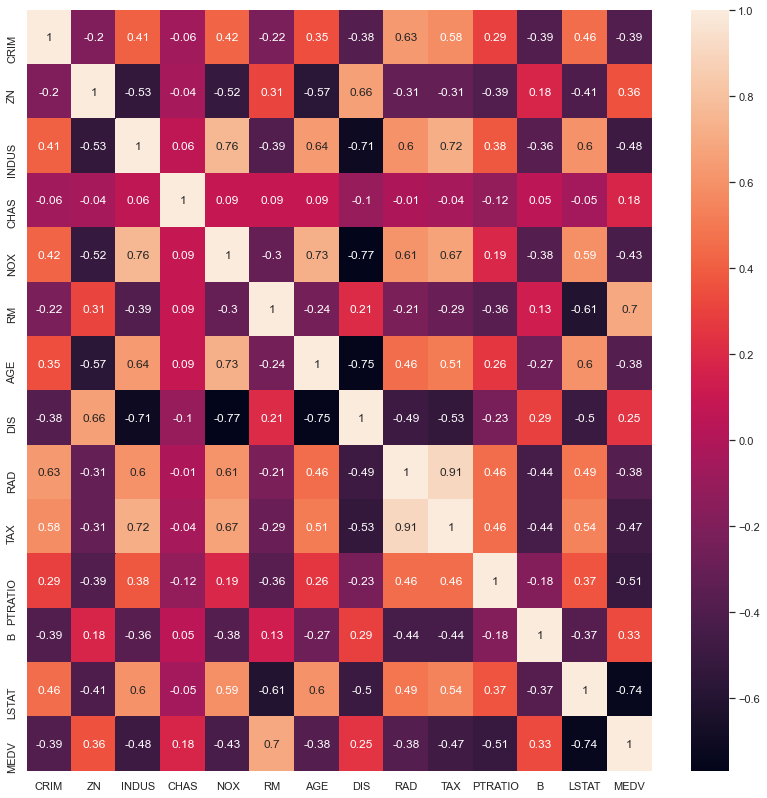

In [6]:
correlation_matrix = boston.corr().round(2)
# fig, ax = plt.subplots(figsize=(16,10))      
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(data=correlation_matrix, annot=True)

### Посмотрим на распределение целевой метки

C:\Users\ALemikhov\Documents\5th_courth\9th_term\DA_CV\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


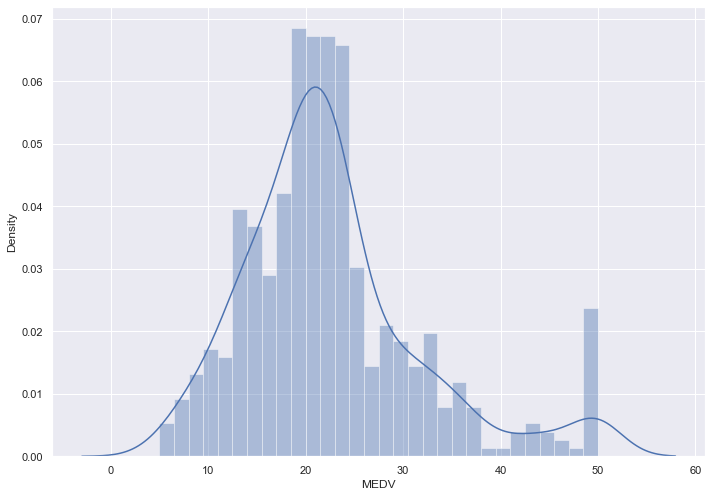

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

### Отрисуем зависимости между целевой меткой и наиболее коррелирующими признаками

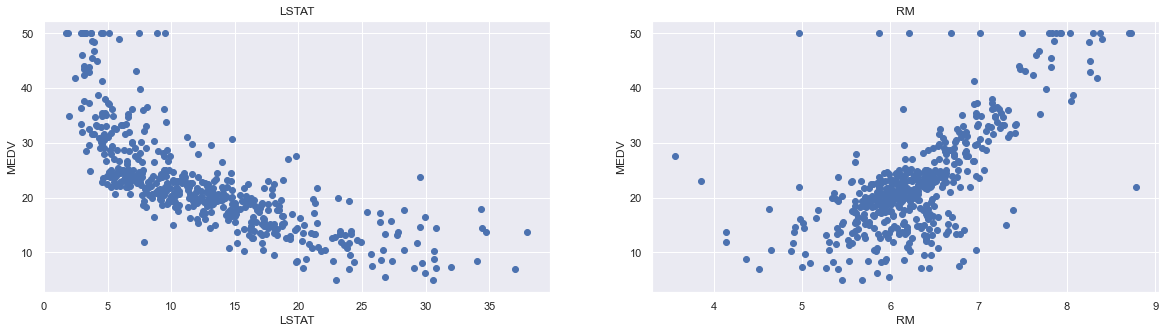

In [8]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Разделим данные

In [9]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

### Разделим данные на обучающую и тестовую выборки

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

### Обучим модель линейной регрессии

In [11]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

### Посмотрим на результаты

In [12]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

print("The model performance for training set")
print('RMSE is {}'.format(rmse))

y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("The model performance for testing set")
print('RMSE is {}'.format(rmse))


The model performance for training set
RMSE is 5.6371293350711955
The model performance for testing set
RMSE is 5.137400784702911


### Рассмотрим распределение ошибки

In [13]:
errors = (Y_test-y_test_predict).to_numpy()

C:\Users\ALemikhov\Documents\5th_courth\9th_term\DA_CV\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


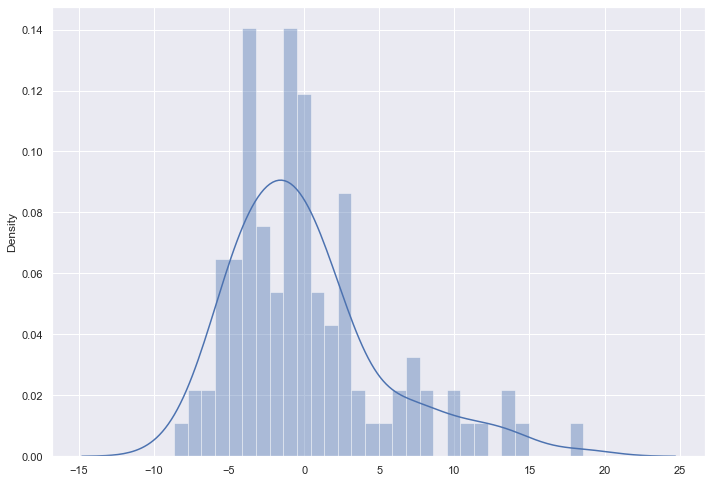

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(errors, bins=30)
plt.show()

# Задание

1) На датасете https://www.kaggle.com/mohansacharya/graduate-admissions построить модель линейной регрессии.
    Попытаться получить хороший результат на отложенной выборке, не переобучиться, поотбирать фичи, попробовать модели с регуляризацией при необходимости

In [15]:
data = pd.read_csv('Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Посмотрим на распределения признаков

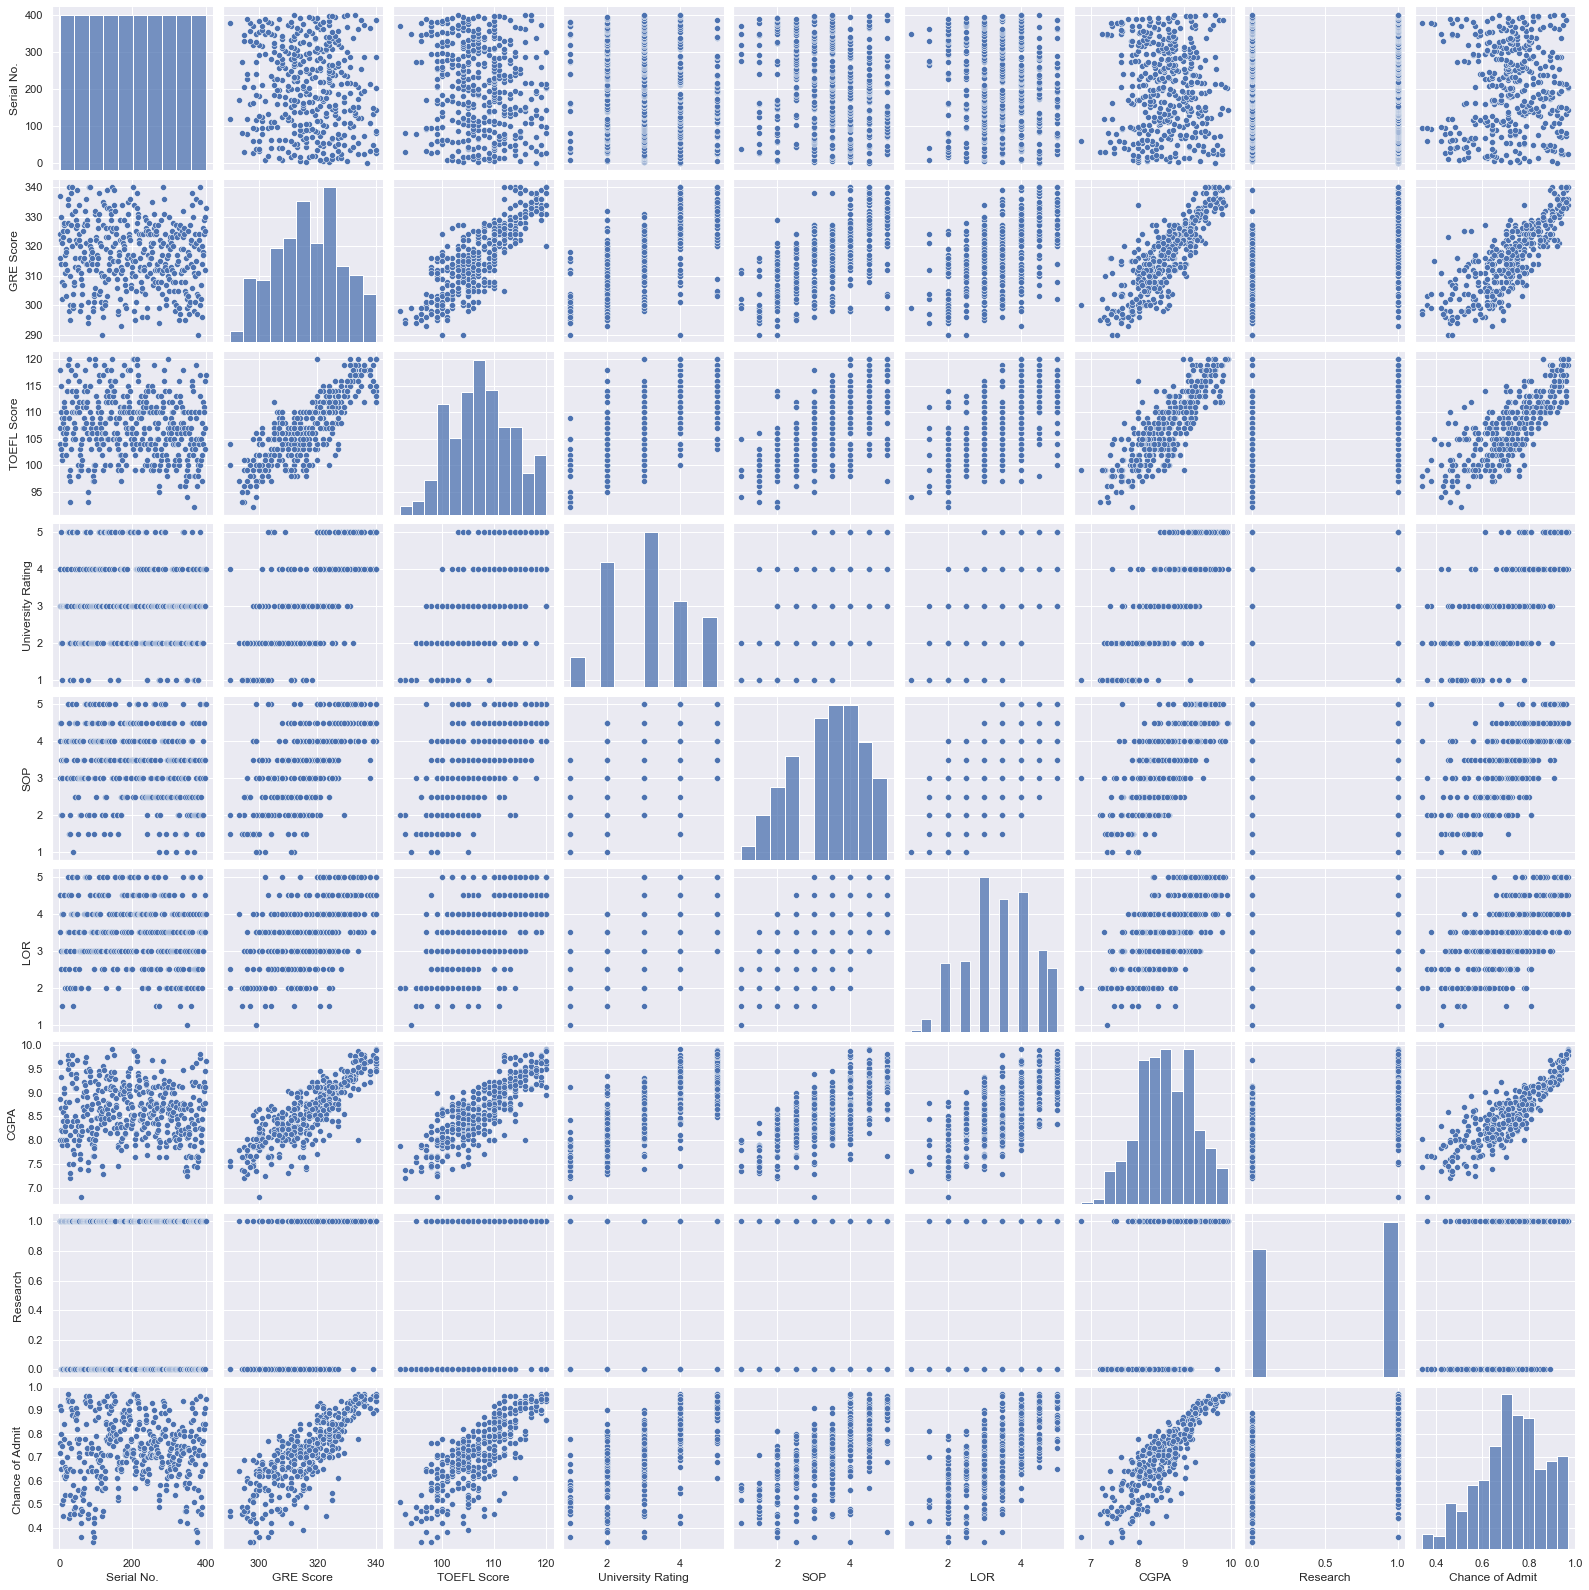

In [16]:
sns.pairplot(data)

## Про расрпеделения

Распределения хорошие, без выбросов. Оценки за экзамены сильно скореллированны. Нужно разобраться, почистить

In [ ]:
sns.set(rc={'figure.figsize':(14,14)})
sns.heatmap(data=data.corr(), annot=True)

<AxesSubplot:>

In [ ]:
data.corr()

In [ ]:
corr_threshold = 0.81
def cols_to_drop(d, thr):
    # Create correlation matrix
    corr_matrix = d.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    return [column for column in upper.columns if any(upper[column] > thr)]

## Уберём лишнее
Избавимся от серийного номера - уникального значения и выкинем целевую переменную в отдельную переменную

In [ ]:
target_col = 'Chance of Admit '
target = data[target_col]
data.drop(columns=[target_col, 'Serial No.'], inplace=True)

## Fit-Predict
Настало время сделать самое главное
### Разделяем на тест и обучение

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)

### Выкидываем сильно скоррелированные признаки

In [ ]:
cd = cols_to_drop(X_train, thr=corr_threshold)
X_test = X_test.drop(columns=cd)
X_train = X_train.drop(columns=cd)

In [ ]:
cd

In [ ]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

### Масштабируем

In [ ]:
reg = LinearRegression()
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

### И наконец предсказываем

In [ ]:
reg.fit(X_train_sc, y_train)
y_train_hat = reg.predict(X_train_sc)
y_test_hat = reg.predict(X_test_sc)

Оценим ошибки

In [ ]:
print(f'Train MSE: {mse(y_train_hat, y_train):.2e}')
print(f'Test  MSE: {mse(y_test_hat, y_test):.2e}')
print()
print(f'Train MAE: {mae(y_train_hat, y_train):.2e}')
print(f'Test  MAE: {mae(y_test_hat, y_test):.2e}')

Судя по метрикам переобучения не произошло. А что насчёт значений коэффициентов?

In [ ]:
features = X_test.columns.values
values = reg.coef_
dict_for_hist = {}
for (k, v) in zip(features, values):
    dict_for_hist[k] = v
plt.figure(figsize=(14, 7))   
plt.bar(dict_for_hist.keys(), dict_for_hist.values(), width=.5, color='g')
plt.show()

Ну да, если ещё раз глянуть на `pairplot`, то сомнений не возникнет. Судя по всему действительно нет переобудчения.

Ах да, давайте глянем на гиперпараметр - `threshold` для удаления коррелирующих признаков

In [ ]:
c_th = np.linspace(0, 1, 100)
mse_test = []
mse_train = []

mae_test = []
mae_train = []
for th in c_th:
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)
    
    cd = cols_to_drop(data, thr=th)
    X_test = X_test.drop(columns=cd)
    X_train = X_train.drop(columns=cd)
    
    reg = LinearRegression()
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_sc = sc.transform(X_train)
    X_test_sc = sc.transform(X_test)
    
    reg.fit(X_train_sc, y_train)
    y_train_hat = reg.predict(X_train_sc)
    y_test_hat = reg.predict(X_test_sc)
    
    mse_train.append(mse(y_train_hat, y_train))
    mse_test.append(mse(y_test_hat, y_test))
    
    
    mae_train.append(mae(y_train_hat, y_train))
    mae_test.append(mae(y_test_hat, y_test))

In [ ]:
plt.figure(figsize=(14, 5)) 
plt.plot(c_th, mse_test, label='mse_test')
plt.plot(c_th, mse_train, label='mse_train')
plt.title('MSE')
plt.xlabel('threshold for high corr')
plt.ylabel('MSE')
plt.legend()
plt.show()

plt.figure(figsize=(14, 5)) 
plt.plot(c_th, mae_test, label='mae_test')
plt.plot(c_th, mae_train, label='mae_train')
plt.title('MAE')
plt.xlabel('threshold for high corr')
plt.ylabel('MAE')
plt.legend()
plt.show()

# НУЖНО БОЛЬШЕ ПРИЗНАКОВ!

Так, выберем всё, будем смотреть на `MSE` (тк именно её мы всётаки оптимизируем) и глянем на L1, L2 регуляризации

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [ ]:
alphas = np.linspace(0.001, 10, 100)
mse_test_l1 = []
mse_train_l1 = []

mse_test_l2 = []
mse_train_l2 = []
for a in alphas:
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state=42)
    
    cd = cols_to_drop(data, thr=1)
    X_test = X_test.drop(columns=cd)
    X_train = X_train.drop(columns=cd)
    
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_sc = sc.transform(X_train)
    X_test_sc = sc.transform(X_test)
    
    reg = Ridge(alpha=a)
    reg.fit(X_train_sc, y_train)
    y_train_hat = reg.predict(X_train_sc)
    y_test_hat = reg.predict(X_test_sc)
    mse_train_l2.append(mse(y_train_hat, y_train))
    mse_test_l2.append(mse(y_test_hat, y_test))
    
    reg = Lasso(alpha=a)
    reg.fit(X_train_sc, y_train)
    y_train_hat = reg.predict(X_train_sc)
    y_test_hat = reg.predict(X_test_sc)
    mse_train_l1.append(mae(y_train_hat, y_train))
    mse_test_l1.append(mae(y_test_hat, y_test))

In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=alphas, y=mse_test_l2,
                    mode='lines',
                    name='test'))
fig.add_trace(go.Scatter(x=alphas, y=mse_train_l2,
                    mode='lines',
                    name='train'))
fig.update_layout(
    width=900,
    height=500,
    title="L2",
    xaxis_title="alphas",
    yaxis_title="MSE"
)

fig.show()


fig = go.Figure()
fig.add_trace(go.Scatter(x=alphas, y=mse_test_l1,
                    mode='lines',
                    name='test'))
fig.add_trace(go.Scatter(x=alphas, y=mse_train_l1,
                    mode='lines',
                    name='train'))
fig.update_layout(
    width=900,
    height=500,
    title="L1",
    xaxis_title="alphas",
    yaxis_title="MSE"
)

fig.show()

# Итого
<ol>
    <li> Регуляризация не нужна 
    <li> Выборка сбалансированна
    <li> Не переобучились
</ol>